In [1]:
from sympy import *
init_printing()
from sympsi import *
from sympsi.boson import *
from sympsi.operatorordering import *
from sympsi.pauli import *

In [17]:
from sympy.physics.quantum.tensorproduct import TensorProduct as tp

In [3]:
omega_r, varepsilon, Delta, g, theta, Omega = symbols("omega_r varepsilon Delta g theta Omega", positive=True, real=True)
Hsym = symbols("H")
a = BosonOp("a")
sx, sy, sz, sp, sm = SigmaX(), SigmaY(), SigmaZ(), SigmaPlus(), SigmaMinus()

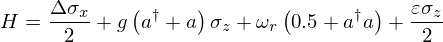

In [4]:
H0 = omega_r * (Dagger(a) * a+1/2)+sz*varepsilon/2+Delta/2*sx+g*(Dagger(a)+a)*sz
Eq(Hsym, H0)

In [5]:
U = exp(-I * atan(varepsilon/Delta)/2 * sy); U

In [6]:
U1 = exp(-I * theta/2 * sy); U1

In [7]:
H11 = hamiltonian_transformation(U1, H0)

In [9]:
H11 = H11.subs(theta, pi/2)

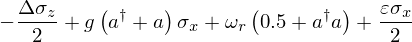

In [10]:
H11

In [9]:
H1 = hamiltonian_transformation(U, H11)

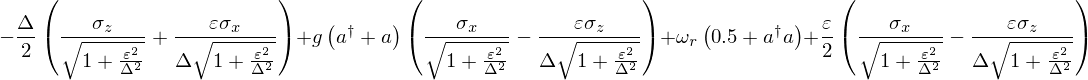

In [10]:
H1

In [11]:
H2 = collect(collect(H1.expand(), (sx,sz)).expand(), (g, sz))

In [19]:
H_res = cancel(simplify(H2))

In [13]:
H11_2 = collect(drop_terms_containing(H11.subs(sx, sp+sm).expand(), [sp*a, sm*Dagger(a)]), (g, varepsilon)).subs(sp/2+sm/2, sx/2)

In [14]:
H1_2 = hamiltonian_transformation(U, H11_2)

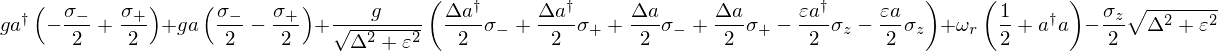

In [114]:
factor(simplify(H1_2.subs(sx, sm+sp).expand().collect(g).collect(sz)).expand(deep=False).collect(g/sqrt(Delta**2+varepsilon**2))\
.collect(omega_r).collect(Dagger(a*g/2)).collect(-a*g/2))

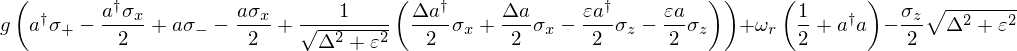

In [77]:
simplify(H1_2.expan`d().collect(g).collect(sz)).expand(deep=False).collect(g/(2*sqrt(Delta**2+varepsilon**2))).collect(g).collect(omega_r)

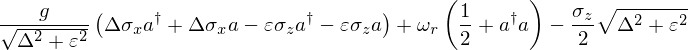

In [76]:
simplify(collect(collect(H_res.expand(), g), sz)).expand(deep=False).collect(g/sqrt(Delta**2+varepsilon**2)).collect(omega_r)

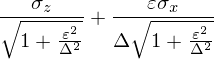

In [15]:
hamiltonian_transformation(exp(-I * theta/2 * sy), sz).subs(theta, atan(varepsilon/Delta))

#Flux qubit hamiltonian 

In [20]:
var("E_J alpha theta phi f Phi_0")

In [21]:
U = E_J*(2+alpha - 2*cos(phi)*cos(theta) - alpha*cos(2*pi*(f-Phi_0/2)/Phi_0 - 2*phi))

In [26]:
derivative = U.diff(f).subs(f, 0)*f

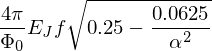

In [33]:
trigsimp(derivative.subs(phi, acos(1/2/alpha))) -trigsimp(derivative.subs(phi, -acos(1/2/alpha)))

## Commutation with $\sigma_x$

In [18]:
sx = Matrix([[0,1], [1,0]])
i = Matrix([[1,0], [0,1]])
rho = MatrixSymbol("rho", 4, 1)

In [29]:
comm = (tp(sx, i) - tp(i, sx.T))

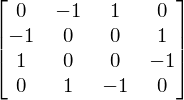

In [45]:
comm

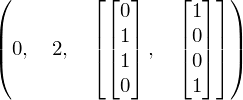

In [44]:
comm.eigenvects()[1]

In [2]:
M = Matrix([[1,0,-1],[1,-1,0],[1,1,1]])

In [5]:
a = M.solve(Matrix([2,5,12]))

In [9]:
sum(a)

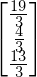

In [10]:
a